In [79]:
# Importamos librerías de análisis de datos
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline
from pywaffle import Waffle

In [80]:
# Cargamos el dataframe
df = pd.read_csv('train.csv', index_col='id', parse_dates=['fecha'])

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240000 entries, 254099 to 121958
Data columns (total 22 columns):
titulo                        234613 non-null object
descripcion                   238381 non-null object
tipodepropiedad               239954 non-null object
direccion                     186928 non-null object
ciudad                        239628 non-null object
provincia                     239845 non-null object
antiguedad                    196445 non-null float64
habitaciones                  217529 non-null float64
garages                       202235 non-null float64
banos                         213779 non-null float64
metroscubiertos               222600 non-null float64
metrostotales                 188533 non-null float64
idzona                        211379 non-null float64
lat                           116512 non-null float64
lng                           116512 non-null float64
fecha                         240000 non-null datetime64[ns]
gimnasio           

In [82]:
#Me quedo con lo que intertesa al análisis
df = df[['tipodepropiedad', 'ciudad', 'provincia', 'metroscubiertos', 'metrostotales', 'idzona', 'precio']]
df.head(2)

,tipodepropiedad,ciudad,provincia,metroscubiertos,metrostotales,idzona,precio
id,,,,,,,
254099,Apartamento,Benito Juárez,Distrito Federal,80.0,80.0,23533.0,2273000.0
53461,Casa en condominio,La Magdalena Contreras,Distrito Federal,268.0,180.0,24514.0,3600000.0


In [83]:
def precio_por_metros_totales(precio, metros):
        return precio/metros

df['precio_por_metrostotales'] = df.apply(lambda x: precio_por_metros_totales(x['precio'], x['metrostotales']), axis=1)

In [84]:
#Precio por metros totales promedio por provincia
provinciaXprecioMetrostotales = df.groupby('provincia').agg({'precio_por_metrostotales': 'mean'})
provinciaXprecioMetrostotales

,precio_por_metrostotales
provincia,
Aguascalientes,8191.787234
Baja California Norte,5968.995969
Baja California Sur,6485.002327
Campeche,8697.074357
Chiapas,11020.039292
Chihuahua,7651.501242
Coahuila,7042.142596
Colima,7313.212268
Distrito Federal,24011.411266


In [85]:
tipodepropiedadXprecioMetrostotales = df.groupby('tipodepropiedad').agg({'precio_por_metrostotales': 'mean'})
tipodepropiedadXprecioMetrostotales

,precio_por_metrostotales
tipodepropiedad,
Apartamento,22734.412915
Bodega comercial,10086.339964
Casa,11945.239265
Casa en condominio,16375.521938
Casa uso de suelo,16890.539240
Departamento Compartido,18582.604084
Duplex,11332.239681
Edificio,23512.404072
Garage,NaN


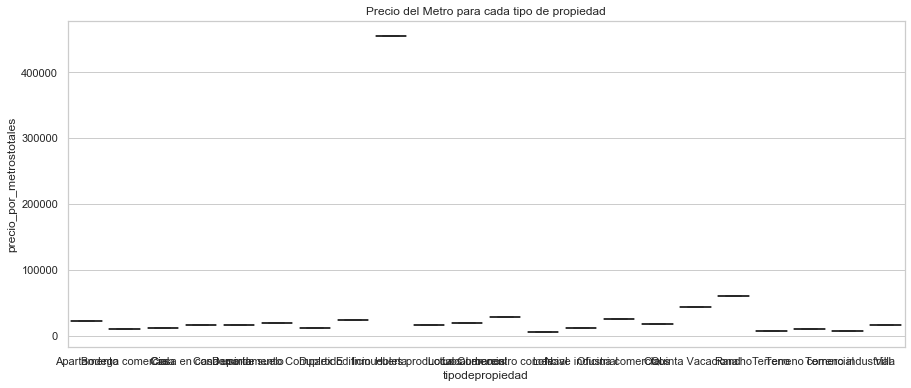

In [96]:
#AGREGAR GRÁFICO
tipodepropiedadXprecioMetrostotales = tipodepropiedadXprecioMetrostotales[tipodepropiedadXprecioMetrostotales['precio_por_metrostotales'] > 0]

plt.figure(figsize=(15, 6))
sns.boxplot(x=tipodepropiedadXprecioMetrostotales.index, y='precio_por_metrostotales', data=tipodepropiedadXprecioMetrostotales, palette='Blues')
plt.title("Precio del Metro para cada tipo de propiedad");

In [69]:
df['dif_metros'] = df['metrostotales'] - df['metroscubiertos']
df['hay_dif_metros'] = df['dif_metros'] > 0

In [70]:
con_dif = df.loc[df['hay_dif_metros'] == True]
sin_dif = df.loc[df['hay_dif_metros'] == False]

precio_por_metros_totales_con_dif = con_dif.groupby('tipodepropiedad').agg({'precio_por_metrostotales': 'mean'})
precio_por_metros_totales_sin_dif = sin_dif.groupby('tipodepropiedad').agg({'precio_por_metrostotales': 'mean'})
precio_por_metros_totales_con_dif

,precio_por_metrostotales
tipodepropiedad,
Apartamento,20502.649953
Bodega comercial,7960.620908
Casa,8049.226131
Casa en condominio,10513.427348
Casa uso de suelo,10416.304446
Departamento Compartido,11721.863234
Duplex,7628.793390
Edificio,11797.688490
Inmuebles productivos urbanos,9129.654133


In [71]:
precio_por_metros_totales_sin_dif

,precio_por_metrostotales
tipodepropiedad,
Apartamento,23147.849235
Bodega comercial,10700.918603
Casa,14599.285934
Casa en condominio,19234.856989
Casa uso de suelo,19627.864165
Departamento Compartido,20383.548558
Duplex,13893.133392
Edificio,24324.811574
Garage,NaN


In [72]:
for key in precio_por_metros_totales_sin_dif:
    print(precio_por_metros_totales_sin_dif[key] - precio_por_metros_totales_con_dif[key])

tipodepropiedad
Apartamento                       2645.199282
Bodega comercial                  2740.297694
Casa                              6550.059803
Casa en condominio                8721.429641
Casa uso de suelo                 9211.559718
Departamento Compartido           8661.685323
Duplex                            6264.340002
Edificio                         12527.123084
Garage                                    NaN
Hospedaje                                 NaN
Huerta                                    NaN
Inmuebles productivos urbanos     9600.251502
Local Comercial                  13489.093777
Local en centro comercial        13853.451994
Lote                                      NaN
Nave industrial                  -1151.317478
Oficina comercial                14997.594878
Otros                             3893.095756
Quinta Vacacional                61481.727931
Rancho                           62412.558876
Terreno                          -2479.136258
Terreno comercial 